## Importing the libraries

In [ ]:
#conda update --name base conda

In [ ]:
#pip install --upgrade scikit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Changing in libraries which is dealing with my version. 

## Loading the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Define X by selecting only the age and EstimatedSalary, and y with purchased column

In [5]:
X = dataset[['Age','EstimatedSalary']] 
Y = dataset['Purchased']

## Print count of each label in Purchased column

In [6]:
Y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

## Print Correlation of each feature in the dataset

In [7]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


# First: Logistic Regression model

## Split the dataset into Training set and Test set with test_size = 0.25 and random_state = 0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 0)

## Train the model with random_state = 0

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
Model = LogisticRegression(random_state=0)
Model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
predictions = Model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Print the prediction results

In [12]:
y_pred =predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Create dataframe with the Actual Purchased and Predict Purchased

In [13]:
test_dataset = pd.DataFrame({
    'Age': X_test['Age'],
     'EstimatedSalary': X_test['EstimatedSalary'],
      'Actual_Purchased': y_test,
       'Predict_Purchased': y_pred
    
})
test_dataset

,Age,EstimatedSalary,Actual_Purchased,Predict_Purchased
132,30,87000,0,0
309,38,50000,0,0
341,35,75000,0,0
196,30,79000,0,0
246,35,50000,0,0
...,...,...,...,...
146,27,96000,1,0
135,23,63000,0,0
390,48,33000,1,0
264,48,90000,1,0


In [14]:
(test_dataset['Actual_Purchased'] == test_dataset['Predict_Purchased']).value_counts()

True     68
False    32
dtype: int64

## Print Confusion Matrix and classification_report

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



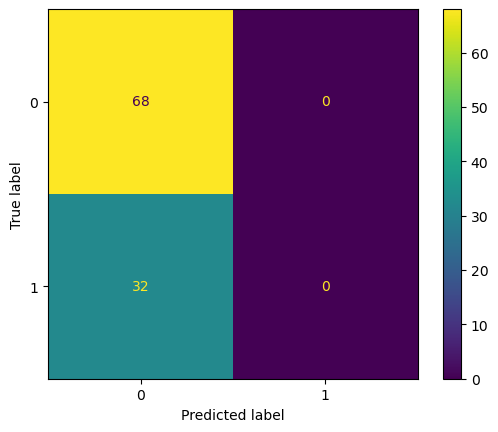

In [16]:
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=Model.classes_)
disp.plot()
plt.show()
#Blue color does'nt change.   


In [17]:
#plot_confusion_matrix(classifier, X=X_test, y_true=y_test, cmap='Blues');
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[68  0]
 [32  0]]
0.68


## Use StandardScaler() to improved performance and re-train your model

In [18]:
scaler = StandardScaler()

In [19]:
X_train1 = scaler.fit_transform(X_train)

In [20]:
X_test2 = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
AnotherModel = LogisticRegression(random_state = 0, solver='lbfgs' )
AnotherModel.fit(X_train1, y_train)
y_pred = AnotherModel.predict(X_test2)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



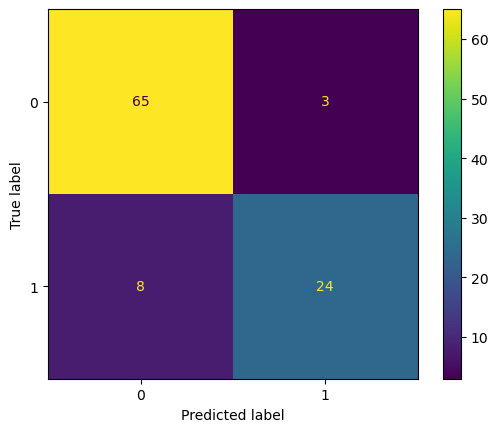

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=AnotherModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=AnotherModel.classes_)
disp.plot()
plt.show()

## Try to Predicting a new result - e.g: person with Age = 30 and Salary = 90,000

In [28]:
New = np.array([[30,90000]])
PredictValue = AnotherModel.predict(New)
print("e.g: Person with Age = 30 and Salary = 90,000:", PredictValue)



Person with Age = 30 and Salary = 90,000: [1]


## Try to Predicting a new result - e.g: person with Age = 40 and Salary = 90,000

In [29]:
New2 = np.array([[40,90000]])
PredictValue2 = AnotherModel.predict(New2)
print("e.g: Person with Age = 40 and Salary = 90,000:", PredictValue2)

Person with Age = 40 and Salary = 90,000: [1]
